In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [3]:
fdir = '/home/scratch/mabitbol/'

In [4]:
fnames = glob.glob(fdir+'*/Daisy/*/*_02_*.npz')

In [5]:
print len(fnames)

25


In [6]:
fnames.sort()

In [7]:
fnames[-9:]

['/home/scratch/mabitbol/S140/Daisy/scan_02_34.raw.vegas/scan_02_34.raw.vegas.B.fits.reduced.npz',
 '/home/scratch/mabitbol/S140/Daisy/scan_02_35.raw.vegas/scan_02_35.raw.vegas.B.fits.reduced.npz',
 '/home/scratch/mabitbol/S140/Daisy/scan_02_36.raw.vegas/scan_02_36.raw.vegas.B.fits.reduced.npz',
 '/home/scratch/mabitbol/S140/Daisy/scan_02_37.raw.vegas/scan_02_37.raw.vegas.B.fits.reduced.npz',
 '/home/scratch/mabitbol/S140/Daisy/scan_02_38.raw.vegas/scan_02_38.raw.vegas.B.fits.reduced.npz',
 '/home/scratch/mabitbol/S140/Daisy/scan_02_39.raw.vegas/scan_02_39.raw.vegas.B.fits.reduced.npz',
 '/home/scratch/mabitbol/S140/Daisy/scan_02_40.raw.vegas/scan_02_40.raw.vegas.B.fits.reduced.npz',
 '/home/scratch/mabitbol/S140/Daisy/scan_02_41.raw.vegas/scan_02_41.raw.vegas.B.fits.reduced.npz',
 '/home/scratch/mabitbol/S140/Daisy/scan_02_42.raw.vegas/scan_02_42.raw.vegas.B.fits.reduced.npz']

In [8]:
def naive_map(data,ra,dec,ra_num_bins=60,dec_num_bins=50):
    ra_bins = np.linspace(ra.min(),ra.max(),ra_num_bins)
    dec_bins = np.linspace(dec.min(),dec.max(),dec_num_bins)
    p,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins),weights=data)
    hits,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins))
    return p/hits, hits, ra_bins, dec_bins

In [17]:
def get_calibratedyy(fname):
    nz = np.load(fname)
    gain = nz['tcaly'] / (nz['yyon'] - nz['yyoff'])
    calibratedxx = (nz['yyoff'] * gain)[:, 100:400].mean(1)
    return calibratedxx, nz['sra'], nz['sdec'], gain[:, 100:400].mean(1)

In [18]:
def get_calibratedxx(fname):
    nz = np.load(fname)
    gain = nz['tcalx'] / (nz['xxon'] - nz['xxoff'])
    calibratedxx = (nz['xxoff'] * gain)[:, 100:400].mean(1)
    return calibratedxx, nz['sra'], nz['sdec'], gain[:, 100:400].mean(1)

In [11]:
calibrated = [] 
ras = []
decs = []
gains = []
for fname in fnames[-9:]:
    calib, ra, dec, gain = get_calibrated(fname)
    calib = calib - np.nanmin(calib)
    calibrated = np.concatenate([calibrated, calib])
    ras = np.concatenate([ras, ra])
    decs = np.concatenate([decs, dec])
    gains = np.concatenate([gains, gain])

/users/mabitbol/miniconda2/envs/gbt/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


In [12]:
datamap, hits, rabins, decbins = naive_map(calibrated, ras, decs, 60, 60)

/users/mabitbol/miniconda2/envs/gbt/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide


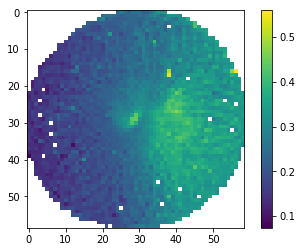

In [13]:
figure()
imshow(datamap.T)
colorbar()

/users/mabitbol/miniconda2/envs/gbt/lib/python2.7/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


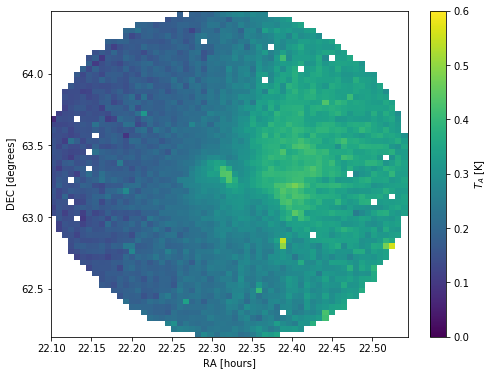

In [14]:
figsize(8,6)
pc = pcolormesh(rabins*24./360, decbins, datamap.T)
clim(0, 0.6)
cb = colorbar()
pc.cmap.set_under('w')
xlabel('RA [hours]')
ylabel('DEC [degrees]')
cb.set_label('$T_A$ [K]')
#savefig('prelimS140map')

In [21]:
calibrated = [] 
ras = []
decs = []
gains = []
for fname in fnames[-9:]:
    calib, ra, dec, gain = get_calibratedxx(fname)
    calib = calib - np.nanmin(calib)
    calibrated = np.concatenate([calibrated, calib])
    ras = np.concatenate([ras, ra])
    decs = np.concatenate([decs, dec])
    gains = np.concatenate([gains, gain])

/users/mabitbol/miniconda2/envs/gbt/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


In [22]:
datamap, hits, rabins, decbins = naive_map(calibrated, ras, decs, 60, 60)

/users/mabitbol/miniconda2/envs/gbt/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide


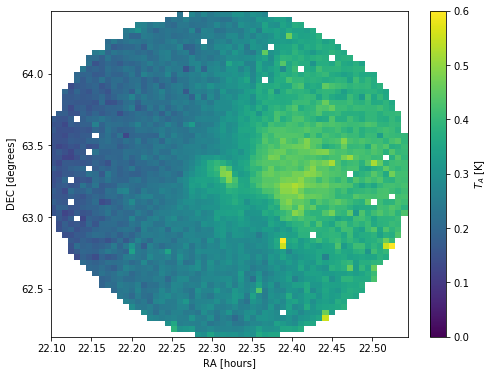

In [23]:
figsize(8,6)
pc = pcolormesh(rabins*24./360, decbins, datamap.T)
clim(0, 0.6)
cb = colorbar()
pc.cmap.set_under('w')
xlabel('RA [hours]')
ylabel('DEC [degrees]')
cb.set_label('$T_A$ [K]')
#savefig('prelimS140map')